<a href="https://colab.research.google.com/github/m607stars/Machine-Learning-Algorithms/blob/master/SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Support Vector Machines (SVMs)** 

# **Data Loading and Pre-processing**

In [62]:
#we first import the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt   # This library is for plotting graphs 
import seaborn as sns #This one is also for plotting raphs

from sklearn.metrics import classification_report, confusion_matrix #Here we import the confusion matrix and the classification report i.e. the final report that tells us about the accuracy and precision of the trained model
from sklearn.model_selection import train_test_split  
from sklearn import datasets
from sklearn.svm import LinearSVC  

import cvxopt

In [63]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

In [64]:
data=pd.read_csv('/content/drive/MyDrive/Datasets /Iris Data Set.csv')
data.drop(['Id'], axis=1, inplace=True)
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [65]:
#For classification we rename the species of the flowers as 0,1,2

data["Species"].replace({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}, inplace=True)
data.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


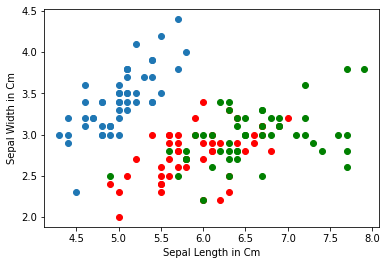

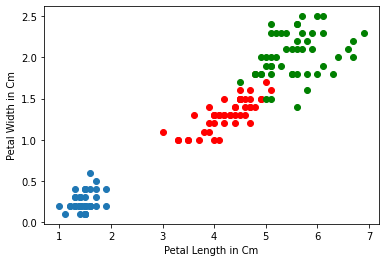

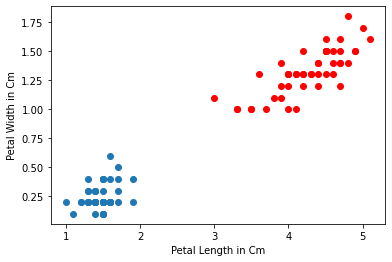

In [66]:
#plot the graph

plt.scatter(data['SepalLengthCm'][:50],data['SepalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['SepalLengthCm'][50:100],data['SepalWidthCm'][50:100],color='red')        
plt.scatter(data['SepalLengthCm'][100:],data['SepalWidthCm'][100:],color='green')       
plt.xlabel("Sepal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Sepal Width in Cm")
plt.show() 

plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')        
plt.scatter(data['PetalLengthCm'][100:],data['PetalWidthCm'][100:],color='green')        
plt.xlabel("Petal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Petal Width in Cm")
plt.show() 

plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          #plotting points on a graph 
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')              
plt.xlabel("Petal Length in Cm")                                                            #Labelling the x and y axis
plt.ylabel("Petal Width in Cm")
plt.show() 

In [68]:
#for simplicity we consider only binary classification
#here we prepare the training and the testing data sets.

data["Species"].replace({0:1,1:-1,2:0}, inplace=True)
X_train_1 = data[['SepalLengthCm','SepalWidthCm']][:45]
Y_train_1 = data['Species'][:45]
X_train_2 = data[['SepalLengthCm','SepalWidthCm']][50:95]
Y_train_2 = data['Species'][50:95]

X_train = X_train_1.append(X_train_2)
Y_train = Y_train_1.append(Y_train_2)
print(X_train)
print(Y_train)

X_test_1 = data[['SepalLengthCm','SepalWidthCm']][45:50]
Y_test_1 = data['Species'][45:50]
X_test_2 = data[['SepalLengthCm','SepalWidthCm']][95:100]
Y_test_2 = data['Species'][95:100]

X_test = X_test_1.append(X_test_2)
Y_test = Y_test_1.append(Y_test_2)
print(X_test)
print(Y_test)

    SepalLengthCm  SepalWidthCm
0             5.1           3.5
1             4.9           3.0
2             4.7           3.2
3             4.6           3.1
4             5.0           3.6
..            ...           ...
90            5.5           2.6
91            6.1           3.0
92            5.8           2.6
93            5.0           2.3
94            5.6           2.7

[90 rows x 2 columns]
0     1
1     1
2     1
3     1
4     1
     ..
90   -1
91   -1
92   -1
93   -1
94   -1
Name: Species, Length: 90, dtype: int64
    SepalLengthCm  SepalWidthCm
45            4.8           3.0
46            5.1           3.8
47            4.6           3.2
48            5.3           3.7
49            5.0           3.3
95            5.7           3.0
96            5.7           2.9
97            6.2           2.9
98            5.1           2.5
99            5.7           2.8
45    1
46    1
47    1
48    1
49    1
95   -1
96   -1
97   -1
98   -1
99   -1
Name: Species, dtype: int64


# **Algorithm**

A brief of SVMs is explained in order to understand the algorithm.
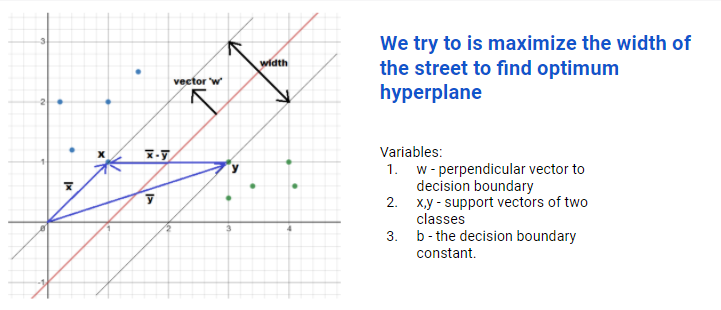

A simplified diagram of SVMs is shown above. The goal is to maximize the width for an optimum solution. 

So, we try to calculate the width with the help of given data points. The maths is given in the below steps. 
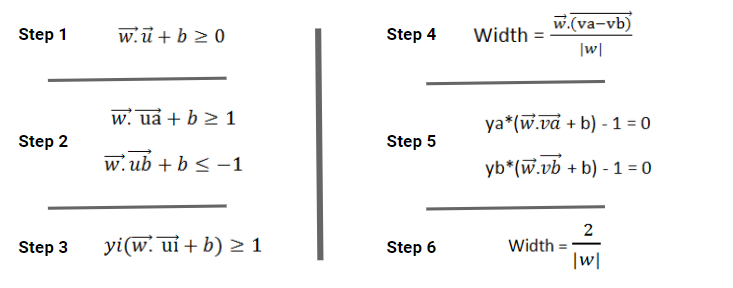

To maximize width, we need to minimize the value of |w|. This is same as minimizing the value of 1/2 * (|w|^2). We try to achieve this using the Lagrange's multipliers. The maths is explained in the below steps. 
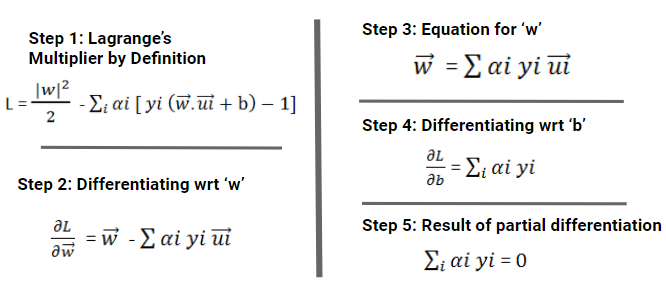

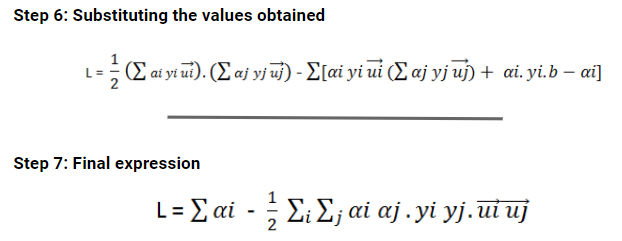

This is further solved by using Quadratic programming. We use the cvxopt library which has the qp solver function which solves the optimization of a  quadratic equation in alpha(a) such that the alpha(a) has two linear constraints- a equality and a inequality based constraint. The cvxopt qp solver takes the form as shown below.
(Derived from its API documentation)

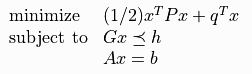

So, comparing the final expression of step 7 i.e. L, and the minimization part given in cvxopt, we get, P = XXtYYt, q=-1


Comparing Ax+b with the equation alpha*(y) = 0 obtained in step 5, we get, b=0, A=y


And, knowing the fact that alpha>=0, comparing it with Gx <=h in cvxopt docs, we get G=-1 and h=0



In [69]:
# We convert the pandas series to numpy arrays

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [70]:
print(Y_train.shape)
print(X_train.shape)

(90,)
(90, 2)


In [ ]:
Y_train = Y_train.reshape(1,-1)
Y_train.shape

(1, 90)

In [71]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [117]:
class SVM:
  def fit(self, X, y):
        #Shape of X_train here is (90,2). We store it in two variables.
        no_of_samples, no_of_features = X.shape

        # We want to take element wise produt of X and y. So we reshape it to (90,1) 
        y = y.reshape(-1,1)
        y_X = y * X               #element wise produt of X and y
        P = np.dot(y_X,y_X.T)     #Forming P as explained above
        P = cvxopt.matrix(P)      #Converting P which is a numpy array to cvxopt matrix
        
        #Forming q as explained above and converting it to cvxopt matrix
        q = np.ones((no_of_samples,1))
        q = cvxopt.matrix(q)
        
        # Shape of y is (90,) so we reshape it to (90,1) so that we can take its dot product with x to obtain Ax=b
        A = y.reshape(1,-1)
        A = A.astype('float') #We convert it to float as qp solver needs float i.e. decimal input
        A = cvxopt.matrix(A)
        
        #We calculate b as explained above. 
        b = np.zeros(1)
        b = b.astype('float')  #We convert it to float as qp solver needs float i.e. decimal input
        b = cvxopt.matrix(b)

        # We compute G, np.eye forms a square identity matrix of given dimension and negate it (as it is required)
        G = np.eye(no_of_samples) * -1
        G = cvxopt.matrix(G)
        
        # Computing H as it is a zero array.  
        h = np.zeros(no_of_samples)
        h = cvxopt.matrix(h)
        
        # We use the cvxopt qp solver.
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # we get the Lagrange multipliers i.e. alpha which are the solution of the above qp solver
        alpha = np.array(solution['x'])
        print(alpha)

        # We set the threshold as we don't need values closer to zero. 
        threshold = 1e-15
        # We calculate sv, where sv is a boolean array of indices whose alpha is greater than threshold.
        sv = (alpha > threshold).flatten()
        
        # We store the values of X,y and alpha in the array. Only those indices are stored whose alpha is greater than threshold 
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        # Intercept
        self.b = 0.0
        for i in range(len(self.alpha)):
            self.b = self.b + self.sv_y[i]
            self.b = self.b - np.sum(self.alpha * self.sv_y * np.matmul(sv,sv.T))   #The last term i.e. np.matmul is the kernel, here we use linear kernel
            temp = self.b[0]
        self.b = self.b / len(self.alpha)
        print(self.b)

        # Weights
        self.w = np.zeros(no_of_features)
        for i in range(len(self.alpha)):
            self.w = self.w + self.alpha[i] * self.sv_y[i] * self.sv[i]
        print(self.w)
        
  def project(self, X):
        return np.dot(X, self.w) + self.b
        
  def predict(self, X):
        return np.sign(self.project(X))

In [118]:
model = SVM()
model.fit(X_train,Y_train)

     pcost       dcost       gap    pres   dres
 0: -1.5957e+01  2.7162e+01  3e+02  2e+01  2e+00
 1:  5.7108e+00 -1.5400e+00  5e+01  3e+00  2e-01
 2:  1.8693e+00 -3.3279e-01  3e+00  4e-02  3e-03
 3:  1.9212e-01 -7.6466e-03  2e-01  2e-04  2e-05
 4:  3.9886e-03 -4.4515e-06  4e-03  2e-06  2e-07
 5:  3.9893e-05 -4.4648e-10  4e-05  2e-08  2e-09
 6:  3.9893e-07 -4.4648e-14  4e-07  2e-10  2e-11
 7:  3.9893e-09 -4.4648e-18  4e-09  2e-12  2e-13
Optimal solution found.
[[4.38217288e-11]
 [2.59017183e-11]
 [4.78310690e-11]
 [4.79688227e-11]
 [4.54962711e-11]
 [3.91452069e-11]
 [6.17756898e-11]
 [4.42055227e-11]
 [4.73592035e-11]
 [3.31227537e-11]
 [4.03815443e-11]
 [4.87115917e-11]
 [3.18128635e-11]
 [5.66817576e-11]
 [3.63453340e-11]
 [3.61461585e-11]
 [3.91452069e-11]
 [4.38217288e-11]
 [3.27291211e-11]
 [4.54121318e-11]
 [2.46822344e-11]
 [4.35566503e-11]
 [1.61660376e-10]
 [3.51844765e-11]
 [4.87115917e-11]
 [2.02461868e-11]
 [4.42055227e-11]
 [4.07671407e-11]
 [3.59316435e-11]
 [4.78310690e-

In [119]:
print(type(X_test))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

In [120]:
# The results are not at all good, but okayish as shown below in the graph. 
# The main motive was to construct a SVM classifier from scratch.

pred=model.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-2.37554817e-09  1.81239467e-09]
[-3.61891518e-26]


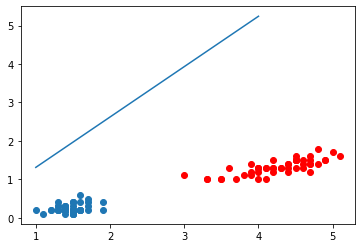

In [122]:
#We first plot the data points
plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')

#Now we plot the decision boundary
# w.x + b = 0
w = model.w
b = model.b
print(w)
print(b)
x1=1
x2=4
y1=-(x1*w[0]+model.b)/w[1]
y2=-(x2*w[0]+model.b)/w[1]
plt.plot([x1,x2],[y1,y2])

# **Using Libraries**

In [ ]:
model=LinearSVC()
model.fit(X_train, Y_train)

pred=model.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



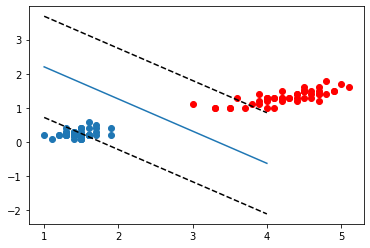

In [ ]:
#We first plot the data points
plt.scatter(data['PetalLengthCm'][:50],data['PetalWidthCm'][:50])                          
plt.scatter(data['PetalLengthCm'][50:100],data['PetalWidthCm'][50:100],color='red')

#Now we plot the decision boundary
# w.x + b = 0
w = model.coef_[0]
x1=1
x2=4
y1=-(x1*w[0]+model.intercept_[0])/w[1]
y2=-(x2*w[0]+model.intercept_[0])/w[1]
plt.plot([x1,x2],[y1,y2])

#Now we plot the support vectors of both the classes
y1=-(x1*w[0]+model.intercept_[0]-1)/w[1]
y2=-(x2*w[0]+model.intercept_[0]-1)/w[1]
plt.plot([x1,x2],[y1,y2],'k--')

y1=-(x1*w[0]+model.intercept_[0]+1)/w[1]
y2=-(x2*w[0]+model.intercept_[0]+1)/w[1]
plt.plot([x1,x2],[y1,y2],'k--')
